# Groundwater Level Analysis in India

### Data Science Methodology

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png" width = 500> 

### Importing Libraries

In [196]:
# scintific computing libraries
import pandas as pd                                     # data structure and tools       
import numpy as np                                      # arrays and matices
import scipy.optimize as opt                            # integrals, differential eq., optimization

# visualisation libraries
import matplotlib.pyplot as plt                         # plots and graphs               
import seaborn as sns                                   # plots: heat maps, time series, violin plots

from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

### Read the csv file

In [3]:
df = pd.read_csv('final.csv')
print(df.shape, '\n')
print(df.dtypes,'\n')
print(df.describe(include='all'))
df.head()

(336716, 14) 

STATE          object
DISTRICT       object
TEH_NAME       object
BLOCK_NAME     object
LAT           float64
LON           float64
SITE_NAME      object
SITE_TYPE      object
WLCODE         object
YEAR_OBS        int64
MONSOON        object
POMRB          object
POMKH          object
PREMON         object
dtype: object 

         STATE DISTRICT   TEH_NAME BLOCK_NAME            LAT            LON  \
count   336716   336716     336716     336716  336716.000000  336716.000000   
unique      32      569       5273       5104            NaN            NaN   
top         MS  Birbhum  Jaisalmer      Patan            NaN            NaN   
freq     31903     2266        785        602            NaN            NaN   
mean       NaN      NaN        NaN        NaN      21.026605      79.090119   
std        NaN      NaN        NaN        NaN       5.857935       4.880084   
min        NaN      NaN        NaN        NaN       8.083333      68.533333   
25%        NaN      NaN      

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,TN,Madurai,Madurai North,Madurai West,10.079167,78.175000,Kadavoor,Dug Well,W02213,2018,7.64,5.69,NaN,NaN
1,TN,Madurai,Madurai South,Thiruparankundram,9.808333,78.099444,Valayankulam-2,Bore Well,W18732,2018,NaN,15.62,NaN,NaN
2,TN,Madurai,Peraiyur,Sedapatti,9.820833,77.804167,Sellampatti,Bore Well,W02228,2018,NaN,9.75,NaN,NaN
3,TN,Madurai,Madurai South,Madurai South,9.908333,78.152778,Madurai South,Dug Well,W02214,2018,NaN,7.79,NaN,NaN
4,TN,Madurai,Madurai South,Madurai South,9.919444,78.118056,Madurai Town,Dug Well,W02215,2018,NaN,7.56,NaN,NaN


### Data Wrangling

In [4]:
df['PREMON'] = pd.to_numeric(df['PREMON'],errors='coerce')
df['MONSOON'] = pd.to_numeric(df['MONSOON'],errors='coerce')
df['POMRB'] = pd.to_numeric(df['POMRB'],errors='coerce')
df['POMKH'] = pd.to_numeric(df['POMKH'],errors='coerce')

df.dtypes

STATE          object
DISTRICT       object
TEH_NAME       object
BLOCK_NAME     object
LAT           float64
LON           float64
SITE_NAME      object
SITE_TYPE      object
WLCODE         object
YEAR_OBS        int64
MONSOON       float64
POMRB         float64
POMKH         float64
PREMON        float64
dtype: object

In [5]:
df['STATE'].unique()

array(['TN', 'CG', 'KL', 'DD', 'WB', 'KA', 'UK', 'JK', 'AN', 'DL', 'JH',
       'NL', 'GA', 'PB', 'GJ', 'OD', 'TR', 'UP', 'MS', 'AS', 'MN', 'AP',
       'HP', 'RJ', 'BR', 'TG', 'PY', 'HR', 'AR', 'MP', 'CH', 'DN'],
      dtype=object)

In [6]:
df['STATE'].replace(['TN', 'CG', 'KL', 'DD', 'WB', 'KA', 'UK', 'JK', 'AN', 'DL',
       'JH', 'NL', 'GA', 'PB', 'GJ', 'OD', 'TR', 'UP', 'MS', 'AS', 'MN',
       'AP', 'HP', 'RJ', 'BR', 'TG', 'PY', 'HR', 'AR', 'MP', 'CH','DN'],
                     ['Tamil Nadu','Chhattisgarh','Kerala','Daman and Diu', 'West Bengal','Karnataka','Uttarakhand',
                     'Jammu and Kashmir','Andaman and Nicobar Islands','Delhi','Jharkhand','Nagaland','Goa','Punjab',
                     'Gujarat','Odisha','Tripura','Uttar Pradesh', 'Maharashtra', 'Assam','Manipur','Andhra Pradesh',
                     'Himachal Pradesh','Rajasthan','Bihar','Telangana','Puducherry','Haryana','Arunachal Pradesh',
                     'Madhya Pradesh','Chandigarh','Dadra and Nagar Haveli'], inplace = True)

In [7]:
df.drop(['TEH_NAME','MONSOON','POMRB','WLCODE','SITE_NAME'], axis=1, inplace=True)
print(df.shape)
df.head(10)

(336716, 9)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,YEAR_OBS,POMKH,PREMON
0,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,2018,NaN,NaN
1,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,2018,NaN,NaN
2,Tamil Nadu,Madurai,Sedapatti,9.820833,77.804167,Bore Well,2018,NaN,NaN
3,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,2018,NaN,NaN
4,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,2018,NaN,NaN
5,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,2018,1.20,NaN
6,Tamil Nadu,Madurai,Sedapatti,9.750000,77.675000,Bore Well,2018,7.85,NaN
7,Tamil Nadu,Madurai,Chellampatti,9.920833,77.883333,Bore Well,2018,9.55,NaN
8,Tamil Nadu,Madurai,Melur,10.030556,78.333333,Bore Well,2018,1.49,NaN
9,Tamil Nadu,Madurai,Alanganallur,10.050000,78.096667,Bore Well,2018,5.66,NaN


In [8]:
# data of 2017

data_2017 = df.loc[df['YEAR_OBS'] == 2017]
data_2017.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2017 = data_2017.rename(columns = {'PREMON':'PREMON_2017'})
data_2017 = data_2017.rename(columns = {'POMKH':'POMKH_2017'})
print(data_2017.shape)
data_2017.head()

(18938, 8)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2017,PREMON_2017
11,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,NaN,6.45
12,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,NaN,NaN
13,Tamil Nadu,Madurai,Usilampatti,9.986111,77.804167,Dug Well,NaN,NaN
14,Tamil Nadu,Madurai,Sedapatti,9.750000,77.675000,Bore Well,9.03,11.55
15,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,16.20,19.45


In [9]:
# data of 2016

data_2016 = df.loc[df['YEAR_OBS'] == 2016]
data_2016.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2016 = data_2016.rename(columns = {'PREMON':'PREMON_2016'})
data_2016 = data_2016.rename(columns = {'POMKH':'POMKH_2016'})
print(data_2016.shape)
data_2016.head()

(19882, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2016,PREMON_2016
22,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.98,4.72
23,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,17.63,17.00
24,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,6.76,NaN
25,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,6.50,NaN
26,Tamil Nadu,Madurai,Melur,9.958333,78.304167,Bore Well,13.75,11.40


In [10]:
# data of 2015

data_2015 = df.loc[df['YEAR_OBS'] == 2015]
data_2015.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2015 = data_2015.rename(columns = {'PREMON':'PREMON_2015'})
data_2015 = data_2015.rename(columns = {'POMKH':'POMKH_2015'})
print(data_2015.shape)
data_2015.head()

(19431, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2015,PREMON_2015
37,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,NaN,4.57
38,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,NaN,18.05
39,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,NaN,5.10
40,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,NaN,6.64
41,Tamil Nadu,Madurai,Melur,9.958333,78.304167,Bore Well,NaN,5.60


In [11]:
# data of 2014

data_2014 = df.loc[df['YEAR_OBS'] == 2014]
data_2014.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2014 = data_2014.rename(columns = {'PREMON':'PREMON_2014'})
data_2014 = data_2014.rename(columns = {'POMKH':'POMKH_2014'})
print(data_2014.shape)
data_2014.head()

(18792, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2014,PREMON_2014
52,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,NaN,5.28
53,Tamil Nadu,Madurai,Usilampatti,9.963333,77.788333,Bore Well,7.53,NaN
54,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,NaN,6.26
55,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,NaN,NaN
56,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,NaN,NaN


In [12]:
# data of 2013

data_2013 = df.loc[df['YEAR_OBS'] == 2013]
data_2013.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2013 = data_2013.rename(columns = {'PREMON':'PREMON_2013'})
data_2013 = data_2013.rename(columns = {'POMKH':'POMKH_2013'})
print(data_2013.shape)
data_2013.head()

(18089, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2013,PREMON_2013
73,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.50,NaN
74,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,17.85,NaN
75,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,5.60,5.70
76,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,NaN,6.95
77,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,5.64,8.14


In [13]:
# data of 2012

data_2012 = df.loc[df['YEAR_OBS'] == 2012]
data_2012.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2012 = data_2012.rename(columns = {'PREMON':'PREMON_2012'})
data_2012 = data_2012.rename(columns = {'POMKH':'POMKH_2012'})
print(data_2012.shape)
data_2012.head()

(14684, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2012,PREMON_2012
89,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,3.25,3.60
90,Tamil Nadu,Madurai,Thirumangalam,9.941389,77.968056,Bore Well,NaN,4.36
91,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,3.76,3.64
92,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,6.57,5.69
93,Tamil Nadu,Madurai,Melur,9.958333,78.304167,Bore Well,2.32,2.70


In [14]:
# data of 2011

data_2011 = df.loc[df['YEAR_OBS'] == 2011]
data_2011.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2011 = data_2011.rename(columns = {'PREMON':'PREMON_2011'})
data_2011 = data_2011.rename(columns = {'POMKH':'POMKH_2011'})
print(data_2011.shape)
data_2011.head()

(12483, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2011,PREMON_2011
141,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,NaN,3.10
142,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,11.39,NaN
143,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,1.44,3.59
144,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,5.49,2.25
145,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,1.56,7.56


In [15]:
# data of 2010

data_2010 = df.loc[df['YEAR_OBS'] == 2010]
data_2010.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2010 = data_2010.rename(columns = {'PREMON':'PREMON_2010'})
data_2010 = data_2010.rename(columns = {'POMKH':'POMKH_2010'})
print(data_2010.shape)
data_2010.head()

(12442, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2010,PREMON_2010
156,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,NaN,2.90
157,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,3.87,6.20
158,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,NaN,6.30
159,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,NaN,6.39
160,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,NaN,7.08


In [16]:
# data of 2009

data_2009 = df.loc[df['YEAR_OBS'] == 2009]
data_2009.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2009 = data_2009.rename(columns = {'PREMON':'PREMON_2009'})
data_2009 = data_2009.rename(columns = {'POMKH':'POMKH_2009'})
print(data_2009.shape)
data_2009.head()

(13027, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2009,PREMON_2009
170,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,4.20,3.10
171,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,6.60,5.90
172,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,6.45,6.40
173,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,7.25,5.29
174,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,7.34,6.18


In [17]:
# data of 2008

data_2008 = df.loc[df['YEAR_OBS'] == 2008]
data_2008.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2008 = data_2008.rename(columns = {'PREMON':'PREMON_2008'})
data_2008 = data_2008.rename(columns = {'POMKH':'POMKH_2008'})
print(data_2008.shape)
data_2008.head()

(13362, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2008,PREMON_2008
184,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.34,2.32
185,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,12.30,11.37
186,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,3.96,4.80
187,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,3.71,3.90
188,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,4.22,4.19


In [18]:
# data of 2007

data_2007 = df.loc[df['YEAR_OBS'] == 2007]
data_2007.drop(['YEAR_OBS'], axis=1, inplace = True)
data_2007 = data_2007.rename(columns = {'PREMON':'PREMON_2007'})
data_2007 = data_2007.rename(columns = {'POMKH':'POMKH_2007'})
print(data_2007.shape)
data_2007.head()

(13451, 8)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2007,PREMON_2007
199,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.33,3.66
200,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,4.90,5.80
201,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,4.75,5.36
202,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,6.02,NaN
203,Tamil Nadu,Madurai,Madurai South,9.919444,78.118056,Dug Well,2.54,5.61


Merge the data from 2007 to 2017, for compare the data of 2017 to 2016 and with decadel mean (2007-2016).

In [19]:
data1 = pd.merge(data_2007, data_2008, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data2 = pd.merge(data1, data_2009, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data3 = pd.merge(data2, data_2010, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data4 = pd.merge(data3, data_2011, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data5 = pd.merge(data4, data_2012, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data6 = pd.merge(data5, data_2013, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data7 = pd.merge(data6, data_2014, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data8 = pd.merge(data7, data_2015, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data9 = pd.merge(data8, data_2016, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])
data = pd.merge(data9, data_2017, on=['LAT','LON','STATE','DISTRICT','BLOCK_NAME','SITE_TYPE'])

print(data.shape)
data.head(10)

(415065, 28)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2007,PREMON_2007,POMKH_2008,PREMON_2008,...,POMKH_2013,PREMON_2013,POMKH_2014,PREMON_2014,POMKH_2015,PREMON_2015,POMKH_2016,PREMON_2016,POMKH_2017,PREMON_2017
0,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.33,3.66,1.34,2.32,...,1.50,NaN,NaN,5.28,NaN,4.57,1.98,4.72,3.70,9.25
1,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,4.90,5.80,5.37,NaN,...,8.90,9.70,NaN,NaN,NaN,6.75,7.32,NaN,NaN,NaN
2,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,4.75,5.36,3.96,4.80,...,5.60,5.70,NaN,6.26,NaN,5.10,6.76,NaN,4.69,6.08
3,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,6.02,NaN,3.71,3.90,...,NaN,6.95,NaN,NaN,NaN,6.64,6.50,NaN,NaN,6.45
4,Tamil Nadu,Madurai,Melur,10.030556,78.333333,Bore Well,3.43,10.50,2.56,1.66,...,8.15,9.15,NaN,16.17,NaN,8.38,8.97,7.40,12.00,15.55
5,Tamil Nadu,Madurai,Alanganallur,10.050000,78.096667,Bore Well,5.00,6.82,NaN,5.88,...,7.00,NaN,NaN,8.69,NaN,5.80,9.63,7.80,8.15,10.50
6,Tamil Nadu,Madurai,Sedapatti,9.750000,77.675000,Bore Well,4.40,5.67,3.65,2.78,...,4.70,NaN,NaN,7.97,NaN,7.44,10.36,8.80,9.03,11.55
7,Tamil Nadu,Madurai,Sedapatti,9.820833,77.804167,Bore Well,3.22,7.80,3.02,5.72,...,9.00,NaN,NaN,16.96,NaN,6.50,10.78,NaN,17.30,18.70
8,Tamil Nadu,Madurai,Chellampatti,9.920833,77.883333,Bore Well,6.02,7.50,NaN,6.78,...,NaN,6.10,NaN,15.95,NaN,9.75,7.28,7.15,7.85,9.25
9,Tamil Nadu,Madurai,Thiruparankundram,9.808333,78.099444,Bore Well,13.12,12.56,12.30,11.37,...,17.85,NaN,NaN,17.89,NaN,18.05,17.63,17.00,16.20,19.45


Add new column 'Decadel Mean (2007-2016)'

In [20]:
data['PREMON_Decadal_Mean'] = (data['PREMON_2007']+data['PREMON_2008']+data['PREMON_2009']+data['PREMON_2010']
                               +data['PREMON_2011']+data['PREMON_2012']+data['PREMON_2013']+data['PREMON_2014']
                               +data['PREMON_2015']+data['PREMON_2016'])/10

data['POMKH_Decadal_Mean'] = (data['POMKH_2007']+data['POMKH_2008']+data['POMKH_2009']+data['POMKH_2010']
                               +data['POMKH_2011']+data['POMKH_2012']+data['POMKH_2013']+data['POMKH_2014']
                               +data['POMKH_2015']+data['POMKH_2016'])/10

In [21]:
data['PREMON_2017-2016'] = data['PREMON_2017'] - data['PREMON_2016']
data['POMKH_2017-2016'] = data['POMKH_2017'] - data['POMKH_2016']

In [22]:
data['PREMON_2017-decadel'] = data['PREMON_2017'] - data['PREMON_Decadal_Mean']
data['POMKH_2017-decadel'] = data['POMKH_2017'] - data['POMKH_Decadal_Mean']

In [23]:
data.drop(['POMKH_2007','POMKH_2008','POMKH_2009','POMKH_2010','POMKH_2011','POMKH_2012','POMKH_2013','POMKH_2014','POMKH_2015',
          'PREMON_2007','PREMON_2008','PREMON_2009','PREMON_2010','PREMON_2011','PREMON_2012','PREMON_2013','PREMON_2014',
          'PREMON_2015'], axis=1, inplace=True)

In [24]:
print(data.shape)
data.head()

(415065, 16)


,STATE,DISTRICT,BLOCK_NAME,LAT,LON,SITE_TYPE,POMKH_2016,PREMON_2016,POMKH_2017,PREMON_2017,PREMON_Decadal_Mean,POMKH_Decadal_Mean,PREMON_2017-2016,POMKH_2017-2016,PREMON_2017-decadel,POMKH_2017-decadel
0,Tamil Nadu,Madurai,Madurai East,10.045833,78.200000,Bore Well,1.98,4.72,3.70,9.25,NaN,NaN,4.53,1.72,NaN,NaN
1,Tamil Nadu,Madurai,Madurai East,9.884444,78.188889,Dug Well,7.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tamil Nadu,Madurai,Madurai West,10.079167,78.175000,Dug Well,6.76,NaN,4.69,6.08,NaN,NaN,NaN,-2.07,NaN,NaN
3,Tamil Nadu,Madurai,Madurai South,9.908333,78.152778,Dug Well,6.50,NaN,NaN,6.45,NaN,NaN,NaN,NaN,NaN,NaN
4,Tamil Nadu,Madurai,Melur,10.030556,78.333333,Bore Well,8.97,7.40,12.00,15.55,8.927,NaN,8.15,3.03,6.623,NaN


### Analysis of 2017 data with 2016 data

In [24]:
final_data1 = data[['STATE','DISTRICT','BLOCK_NAME','SITE_TYPE','PREMON_2016','PREMON_2017','PREMON_2017-2016',
                    'POMKH_2016','POMKH_2017','POMKH_2017-2016']]

In [25]:
final_data1.dropna(subset=['PREMON_2017-2016','POMKH_2017-2016'], axis=0, inplace = True) 
print(final_data1.shape)
final_data1.head()

(126129, 10)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016
0,Tamil Nadu,Madurai,Madurai East,Bore Well,4.72,9.25,4.53,1.98,3.70,1.72
4,Tamil Nadu,Madurai,Melur,Bore Well,7.40,15.55,8.15,8.97,12.00,3.03
5,Tamil Nadu,Madurai,Alanganallur,Bore Well,7.80,10.50,2.70,9.63,8.15,-1.48
6,Tamil Nadu,Madurai,Sedapatti,Bore Well,8.80,11.55,2.75,10.36,9.03,-1.33
8,Tamil Nadu,Madurai,Chellampatti,Bore Well,7.15,9.25,2.10,7.28,7.85,0.57


In [26]:
final_data1.to_csv('Analysis of 2017 with 2016 data.csv', index = False)

#### PREMON Water Level of 2017 Increased with previous year

In [27]:
Premon_data1 = final_data1[final_data1['PREMON_2017']>final_data1['PREMON_2016']]
Premon_data1['Water Level Status'] = 'Increased'
print(Premon_data1.shape)
Premon_data1.head()

(73425, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
0,Tamil Nadu,Madurai,Madurai East,Bore Well,4.72,9.25,4.53,1.98,3.70,1.72,Increased
4,Tamil Nadu,Madurai,Melur,Bore Well,7.40,15.55,8.15,8.97,12.00,3.03,Increased
5,Tamil Nadu,Madurai,Alanganallur,Bore Well,7.80,10.50,2.70,9.63,8.15,-1.48,Increased
6,Tamil Nadu,Madurai,Sedapatti,Bore Well,8.80,11.55,2.75,10.36,9.03,-1.33,Increased
8,Tamil Nadu,Madurai,Chellampatti,Bore Well,7.15,9.25,2.10,7.28,7.85,0.57,Increased


In [28]:
Premon_data1.drop(['POMKH_2016','POMKH_2017','POMKH_2017-2016'], axis=1, inplace=True)

In [29]:
Premon_data1.to_csv('PREMON Water Level Increased with previous year.csv', index = False)

#### PREMON Water Level Unchanged with previous year

In [30]:
Premon_data2 = final_data1[final_data1['PREMON_2017']==final_data1['PREMON_2016']]
Premon_data2['Water Level Status'] = 'Unchanged'
print(Premon_data2.shape)
Premon_data2.head()

(279, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
63,Tamil Nadu,The Nilgiris,Coonoor,Dug Well,5.05,5.05,0.0,5.30,2.97,-2.33,Unchanged
390,Tamil Nadu,Nagappattinam,Tharangambadi,Dug Well,2.05,2.05,0.0,1.65,1.88,0.23,Unchanged
545,Chhattisgarh,Dhamtari,Magarlod,Dug Well,10.68,10.68,0.0,5.50,2.78,-2.72,Unchanged
873,Chhattisgarh,Raipur,Bilaigarh,Dug Well,5.35,5.35,0.0,1.02,1.56,0.54,Unchanged
884,Chhattisgarh,Raigarh,Lailunga,Dug Well,10.35,10.35,0.0,5.10,5.30,0.20,Unchanged


In [31]:
Premon_data2.drop(['POMKH_2016','POMKH_2017','POMKH_2017-2016'], axis=1, inplace=True)

In [32]:
Premon_data2.to_csv('PREMON Water Level Unchanged with previous year.csv', index = False)

#### PREMON Water Level Decreased with previous year

In [33]:
Premon_data3 = final_data1[final_data1['PREMON_2017']<final_data1['PREMON_2016']]
Premon_data3['Water Level Status'] = 'Decreased'
print(Premon_data3.shape)
Premon_data3.head(10)

(52425, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
35,Tamil Nadu,Pudukkottai,Aranthangi,Dug Well,5.22,4.92,-0.30,3.25,4.97,1.72,Decreased
44,Tamil Nadu,Pudukkottai,Tiruvarankulam,Dug Well,5.60,5.48,-0.12,4.75,4.60,-0.15,Decreased
59,Tamil Nadu,The Nilgiris,Udhagamandalam,Dug Well,1.65,1.50,-0.15,2.55,1.45,-1.10,Decreased
93,Tamil Nadu,Erode,Bhavani,Dug Well,7.62,4.93,-2.69,6.69,10.29,3.60,Decreased
153,Tamil Nadu,Krishnagiri,Hosur,Bore Well,11.70,11.20,-0.50,13.35,8.98,-4.37,Decreased
161,Tamil Nadu,Krishnagiri,Kelamangalam,Dug Well,5.78,4.80,-0.98,3.44,1.57,-1.87,Decreased
218,Tamil Nadu,Dindigul,Dindigul,Dug Well,5.95,3.15,-2.80,2.30,2.09,-0.21,Decreased
226,Tamil Nadu,Dindigul,Kodaikanal,Dug Well,6.27,5.50,-0.77,6.12,5.51,-0.61,Decreased
240,Tamil Nadu,Dindigul,Vadamadurai,Bore Well,19.20,10.36,-8.84,26.20,15.50,-10.70,Decreased
282,Tamil Nadu,Tirunelveli,Tenkasi,Dug Well,11.87,8.60,-3.27,13.50,13.30,-0.20,Decreased


In [34]:
Premon_data3.drop(['POMKH_2016','POMKH_2017','POMKH_2017-2016'], axis=1, inplace=True)

In [35]:
Premon_data3.to_csv('PREMON Water Level Decreased with previous year.csv', index = False)

#### POMKH Water Level Increased with previous year

In [36]:
Postmon_data1 = final_data1[final_data1['POMKH_2017']>final_data1['POMKH_2016']]
Postmon_data1['Water Level Status'] = 'Increased'
print(Postmon_data1.shape)
Postmon_data1.head()

(59241, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
0,Tamil Nadu,Madurai,Madurai East,Bore Well,4.72,9.25,4.53,1.98,3.70,1.72,Increased
4,Tamil Nadu,Madurai,Melur,Bore Well,7.40,15.55,8.15,8.97,12.00,3.03,Increased
8,Tamil Nadu,Madurai,Chellampatti,Bore Well,7.15,9.25,2.10,7.28,7.85,0.57,Increased
11,Tamil Nadu,Thoothukkudi,Kayatharu,Dug Well,3.73,7.51,3.78,5.63,7.51,1.88,Increased
12,Tamil Nadu,Thoothukkudi,Kayatharu,Bore Well,7.48,18.90,11.42,13.30,14.59,1.29,Increased


In [37]:
Postmon_data1.drop(['PREMON_2016','PREMON_2017','PREMON_2017-2016'], axis=1, inplace=True)

In [38]:
Postmon_data1.to_csv('POMKH Water Level Increased with previous year.csv', index = False)

#### POMKH Water Level Unchanged with previous year

In [39]:
Postmon_data2 = final_data1[final_data1['POMKH_2017']==final_data1['POMKH_2016']]
Postmon_data2['Water Level Status'] = 'Unchanged'
print(Postmon_data2.shape)
Postmon_data2.head()

(64, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
19,Tamil Nadu,Thoothukkudi,Udangudi,Dug Well,5.10,7.10,2.00,7.1,7.1,0.0,Unchanged
165,Tamil Nadu,Chennai,Chennai,Dug Well,2.60,5.05,2.45,3.4,3.4,0.0,Unchanged
332,Tamil Nadu,Ramanathapuram,Mandapam,Dug Well,1.83,2.05,0.22,2.1,2.1,0.0,Unchanged
565,Chhattisgarh,Jashpur,Jashpur,Dug Well,10.10,7.92,-2.18,4.5,4.5,0.0,Unchanged
566,Chhattisgarh,Jashpur,Farsabahar,Dug Well,11.00,6.04,-4.96,5.5,5.5,0.0,Unchanged


In [40]:
Postmon_data2.drop(['PREMON_2016','PREMON_2017','PREMON_2017-2016'], axis=1, inplace=True)

In [41]:
Postmon_data2.to_csv('POMKH Water Level Unchanged with previous year.csv', index = False)

#### POMKH Water Level Decreased with previous year

In [42]:
Postmon_data3 = final_data1[final_data1['POMKH_2017']<final_data1['POMKH_2016']]
Postmon_data3['Water Level Status'] = 'Decreased'
print(Postmon_data3.shape)
Postmon_data3.head(10)

(66824, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_2016,PREMON_2017,PREMON_2017-2016,POMKH_2016,POMKH_2017,POMKH_2017-2016,Water Level Status
5,Tamil Nadu,Madurai,Alanganallur,Bore Well,7.80,10.50,2.70,9.63,8.15,-1.48,Decreased
6,Tamil Nadu,Madurai,Sedapatti,Bore Well,8.80,11.55,2.75,10.36,9.03,-1.33,Decreased
9,Tamil Nadu,Madurai,Thiruparankundram,Bore Well,17.00,19.45,2.45,17.63,16.20,-1.43,Decreased
17,Tamil Nadu,Thoothukkudi,Ottapidaram,Dug Well,4.90,7.95,3.05,7.05,4.56,-2.49,Decreased
22,Tamil Nadu,Thoothukkudi,Udangudi,Dug Well,3.16,3.84,0.68,3.54,3.44,-0.10,Decreased
29,Tamil Nadu,Thoothukkudi,Tiruchendur,Dug Well,5.28,6.30,1.02,6.22,5.90,-0.32,Decreased
44,Tamil Nadu,Pudukkottai,Tiruvarankulam,Dug Well,5.60,5.48,-0.12,4.75,4.60,-0.15,Decreased
53,Tamil Nadu,Pudukkottai,Kulathur,Dug Well,4.60,8.44,3.84,4.20,2.64,-1.56,Decreased
57,Tamil Nadu,The Nilgiris,Panthalur,Dug Well,2.82,6.01,3.19,3.45,1.87,-1.58,Decreased
59,Tamil Nadu,The Nilgiris,Udhagamandalam,Dug Well,1.65,1.50,-0.15,2.55,1.45,-1.10,Decreased


In [43]:
Postmon_data3.drop(['PREMON_2016','PREMON_2017','PREMON_2017-2016'], axis=1, inplace=True)

In [44]:
Postmon_data3.to_csv('POMKH Water Level Decreased with previous year.csv', index = False)

### Analysis of 2017 data with decadel mean (2007-2016) data

In [25]:
final_data2 = data[['STATE','DISTRICT','BLOCK_NAME','SITE_TYPE','PREMON_Decadal_Mean','PREMON_2017','PREMON_2017-decadel',
                    'POMKH_Decadal_Mean','POMKH_2017','POMKH_2017-decadel']]

In [46]:
final_data2.dropna(subset=['PREMON_2017-decadel','POMKH_2017-decadel'], axis=0, inplace = True) 
print(final_data2.shape)
final_data2.head()

(2313, 10)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel
105,Tamil Nadu,Erode,Kodumudi,Dug Well,4.8280,6.35,1.5220,3.564,3.40,-0.164
109,Tamil Nadu,Kancheepuram,Kancheepuram,Dug Well,9.1540,7.38,-1.7740,8.384,5.66,-2.724
548,Chhattisgarh,Dhamtari,Kurud,Dug Well,7.5440,9.56,2.0160,2.664,2.20,-0.464
552,Chhattisgarh,Dhamtari,Sihawa (nagri),Dug Well,4.9405,6.73,1.7895,3.748,3.17,-0.578
583,Chhattisgarh,Rajnandgaon,Dongargarh,Dug Well,10.2890,10.85,0.5610,3.061,5.34,2.279


In [47]:
final_data2.to_csv('Analysis of 2017 with decadel mean data.csv', index = False)

#### PREMON Water Level Increased with decadel mean

In [48]:
Premon_data4 = final_data2[final_data2['PREMON_2017']>final_data2['PREMON_Decadal_Mean']]
Premon_data4['Water Level Status'] = 'Increased'
print(Premon_data4.shape)
Premon_data4.head(10)

(1418, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status
105,Tamil Nadu,Erode,Kodumudi,Dug Well,4.8280,6.35,1.5220,3.564,3.40,-0.164,Increased
548,Chhattisgarh,Dhamtari,Kurud,Dug Well,7.5440,9.56,2.0160,2.664,2.20,-0.464,Increased
552,Chhattisgarh,Dhamtari,Sihawa (nagri),Dug Well,4.9405,6.73,1.7895,3.748,3.17,-0.578,Increased
583,Chhattisgarh,Rajnandgaon,Dongargarh,Dug Well,10.2890,10.85,0.5610,3.061,5.34,2.279,Increased
653,Chhattisgarh,Rajnandgaon,Rajnandgaon,Dug Well,7.1430,7.70,0.5570,3.130,5.62,2.490,Increased
658,Chhattisgarh,Korba,Pondi,Dug Well,3.5420,4.30,0.7580,2.122,4.00,1.878,Increased
659,Chhattisgarh,Korba,Pondi,Dug Well,7.9710,8.15,0.1790,4.190,4.60,0.410,Increased
664,Chhattisgarh,Korba,Kartala,Dug Well,9.9975,12.79,2.7925,6.601,3.76,-2.841,Increased
668,Chhattisgarh,Korba,Pondi,Dug Well,10.1130,11.44,1.3270,5.004,6.86,1.856,Increased
669,Chhattisgarh,Korba,Pondi,Dug Well,10.4280,13.88,3.4520,7.430,11.97,4.540,Increased


In [49]:
Premon_data4.drop(['POMKH_Decadal_Mean','POMKH_2017','POMKH_2017-decadel'], axis=1, inplace=True)

In [50]:
Premon_data4.to_csv('PREMON Water Level Increased with decadel mean.csv', index = False)

#### PREMON Water Level Unchanged with decadel mean

In [51]:
Premon_data5 = final_data2[final_data2['PREMON_2017']==final_data2['PREMON_Decadal_Mean']]
Premon_data5['Water Level Status'] = 'Unchanged'
print(Premon_data5.shape)
Premon_data5.head(10)

(1, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status
300267,Karnataka,Belgaum,Khanapur,Dug Well,9.72,9.72,0.0,5.063,9.72,4.657,Unchanged


In [52]:
Premon_data5.drop(['POMKH_Decadal_Mean','POMKH_2017','POMKH_2017-decadel'], axis=1, inplace=True)

In [53]:
Premon_data5.to_csv('PREMON Water Level Unchanged with decadel mean.csv', index = False)

#### PREMON Water Level Decreased with decadel mean

In [54]:
Premon_data6 = final_data2[final_data2['PREMON_2017']<final_data2['PREMON_Decadal_Mean']]
Premon_data6['Water Level Status'] = 'Decreased'
print(Premon_data6.shape)
Premon_data6.head(10)

(894, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status
109,Tamil Nadu,Kancheepuram,Kancheepuram,Dug Well,9.154,7.38,-1.774,8.384,5.66,-2.724,Decreased
586,Chhattisgarh,Rajnandgaon,Khairagarh,Dug Well,6.260,5.25,-1.010,2.301,5.59,3.289,Decreased
589,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,18.006,15.50,-2.506,9.859,6.31,-3.549,Decreased
590,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,18.006,10.25,-7.756,9.859,10.40,0.541,Decreased
591,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.491,15.50,-1.991,9.479,6.31,-3.169,Decreased
592,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.491,10.25,-7.241,9.479,10.40,0.921,Decreased
593,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.561,15.50,-2.061,9.499,6.31,-3.189,Decreased
594,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.561,10.25,-7.311,9.499,10.40,0.901,Decreased
595,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.046,15.50,-1.546,9.119,6.31,-2.809,Decreased
596,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.046,10.25,-6.796,9.119,10.40,1.281,Decreased


In [55]:
Premon_data6.drop(['POMKH_Decadal_Mean','POMKH_2017','POMKH_2017-decadel'], axis=1, inplace=True)

In [56]:
Premon_data6.to_csv('PREMON Water Level Decreased with decadel mean.csv', index = False)

#### POMKH Water Level Increased with decadel mean

In [57]:
Postmon_data4 = final_data2[final_data2['POMKH_2017']>final_data2['POMKH_Decadal_Mean']]
Postmon_data4['Water Level Status'] = 'Increased'
print(Postmon_data4.shape)
Postmon_data4.head()

(1260, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status
583,Chhattisgarh,Rajnandgaon,Dongargarh,Dug Well,10.289,10.85,0.561,3.061,5.34,2.279,Increased
586,Chhattisgarh,Rajnandgaon,Khairagarh,Dug Well,6.260,5.25,-1.010,2.301,5.59,3.289,Increased
590,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,18.006,10.25,-7.756,9.859,10.40,0.541,Increased
592,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.491,10.25,-7.241,9.479,10.40,0.921,Increased
594,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,17.561,10.25,-7.311,9.499,10.40,0.901,Increased


In [58]:
Postmon_data4.drop(['PREMON_Decadal_Mean','PREMON_2017','PREMON_2017-decadel'], axis=1, inplace=True)

In [59]:
Postmon_data4.to_csv('POMKH Water Level Increased with decadel mean.csv', index = False)

#### POMKH Water Level Unchanged with decadel mean

In [60]:
Postmon_data5 = final_data2[final_data2['POMKH_2017']==final_data2['POMKH_Decadal_Mean']]
Postmon_data5['Water Level Status'] = 'Unchanged'
print(Postmon_data5.shape)
Postmon_data5.head()

(0, 11)


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status


In [61]:
Postmon_data5.drop(['PREMON_Decadal_Mean','PREMON_2017','PREMON_2017-decadel'], axis=1, inplace=True)

In [62]:
Postmon_data5.to_csv('POMKH Water Level Unchanged with decadel mean.csv', index = False)

#### POMKH Water Level Decreased with decadel mean

In [63]:
Postmon_data6 = final_data2[final_data2['POMKH_2017']<final_data2['POMKH_Decadal_Mean']]
Postmon_data6['Water Level Status'] = 'Decreased'
print(Postmon_data6.shape)
Postmon_data6.head()

(1053, 11)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATE,DISTRICT,BLOCK_NAME,SITE_TYPE,PREMON_Decadal_Mean,PREMON_2017,PREMON_2017-decadel,POMKH_Decadal_Mean,POMKH_2017,POMKH_2017-decadel,Water Level Status
105,Tamil Nadu,Erode,Kodumudi,Dug Well,4.8280,6.35,1.5220,3.564,3.40,-0.164,Decreased
109,Tamil Nadu,Kancheepuram,Kancheepuram,Dug Well,9.1540,7.38,-1.7740,8.384,5.66,-2.724,Decreased
548,Chhattisgarh,Dhamtari,Kurud,Dug Well,7.5440,9.56,2.0160,2.664,2.20,-0.464,Decreased
552,Chhattisgarh,Dhamtari,Sihawa (nagri),Dug Well,4.9405,6.73,1.7895,3.748,3.17,-0.578,Decreased
589,Chhattisgarh,Rajnandgaon,Rajnandgaon,Bore Well,18.0060,15.50,-2.5060,9.859,6.31,-3.549,Decreased


In [64]:
Postmon_data6.drop(['PREMON_Decadal_Mean','PREMON_2017','PREMON_2017-decadel'], axis=1, inplace=True)

In [70]:
Postmon_data6.to_csv('POMKH Water Level Decreased with decadel mean.csv', index = False)

## ARIMA Model

In [185]:
df_1 = df[['YEAR_OBS', 'POMKH', 'PREMON']]
print(df_1.shape)
df_1.head()

(336716, 3)


,YEAR_OBS,POMKH,PREMON
0,2018,NaN,NaN
1,2018,NaN,NaN
2,2018,NaN,NaN
3,2018,NaN,NaN
4,2018,NaN,NaN


In [186]:
df_2 = df_1.dropna(axis=0)
print(df_2.shape)
df_2.head()

(223451, 3)


,YEAR_OBS,POMKH,PREMON
14,2017,9.03,11.55
15,2017,16.20,19.45
16,2017,17.30,18.70
17,2017,12.00,15.55
18,2017,8.15,10.50


In [187]:
df_3 = df_2.groupby(['YEAR_OBS']).mean()
print(df_3.shape)
df_3.head()

(25, 2)


,POMKH,PREMON
YEAR_OBS,,
1994,18.743924,21.287041
1995,10.065197,12.456691
1996,6.454244,9.098170
1997,6.616239,9.061183
1998,6.176591,8.727401


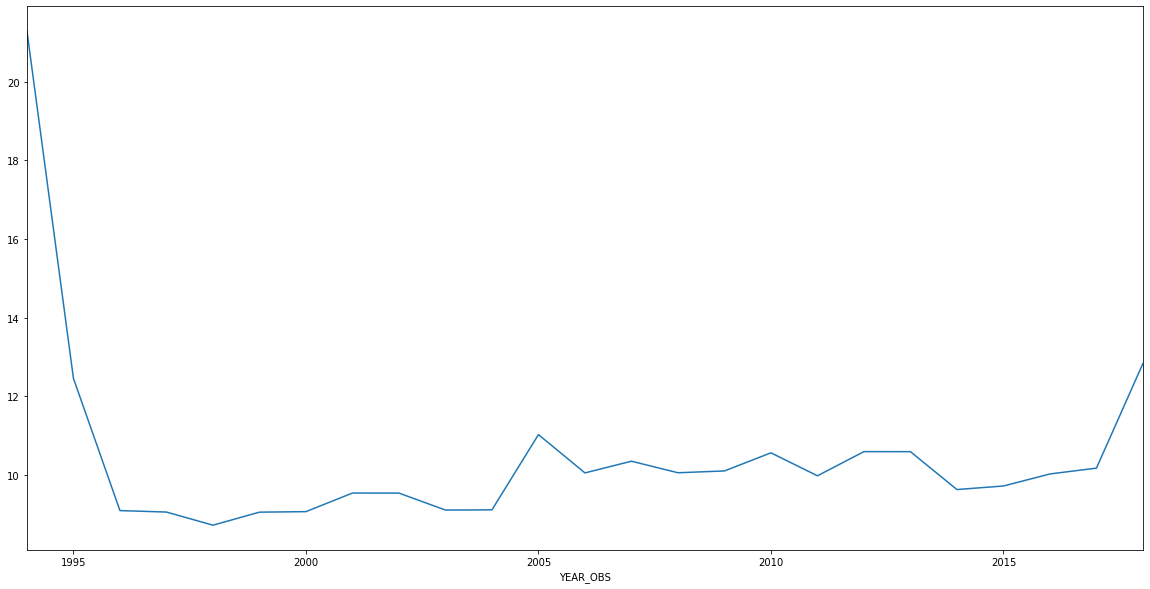

In [188]:
df_3['PREMON'].plot(figsize=(20,10))

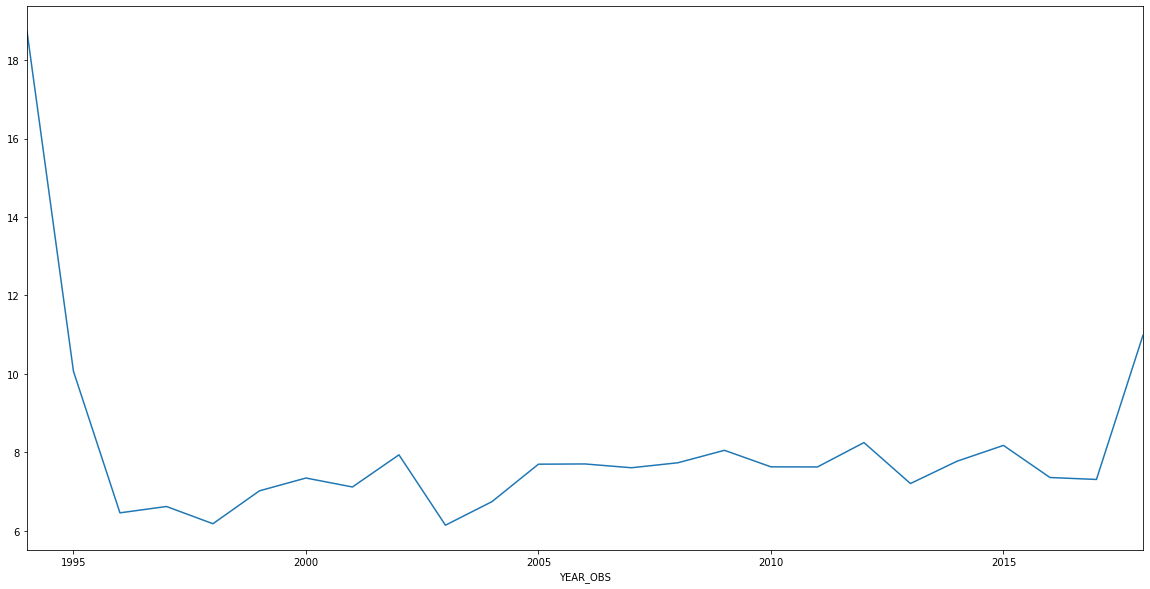

In [189]:
df_3['POMKH'].plot(figsize=(20,10))

In [190]:
df_4 = df_3['POMKH'].values
print(df_4.size)

train2 = df_4[1:20]
print(train2.size)

test2 = df_4[20:] 
print(test2.size)

25
19
5


In [134]:
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))

In [135]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 53.598725936316825
(0, 0, 1) 54.65404305943365
(0, 0, 2) 56.123409507000375
(0, 1, 0) 54.50802504216344
(0, 1, 1) 55.47976531251616
(0, 1, 2) 57.479475231169914
(0, 2, 0) 61.29437589324777
(0, 2, 1) 55.530846969775524
(0, 2, 2) 56.98640745119546
(1, 0, 0) 54.3723089969318
(1, 0, 1) 56.34700015920568
(1, 0, 2) 58.05986237134465
(1, 1, 0) 55.457698646066795
(1, 1, 1) 56.71791483562082
(1, 2, 0) 56.76287900383382
(1, 2, 1) 56.75964902717584
(2, 0, 0) 56.315791683612375
(2, 0, 1) 56.86556499391359
(2, 1, 0) 57.457002218451905
(2, 1, 1) 58.534759479495925
(2, 2, 0) 57.9224964148392


In [182]:
#p,d,q  
#p = periods taken for autoregressive model
#d = Integrated order, difference
#q = periods in moving average model

model_arima = ARIMA(train2, order=(3, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

64.3687451350708


In [183]:
predictions_POMKH = model_arima_fit.forecast(steps=5)[0]
predictions_POMKH

array([7.57590756, 7.4677118 , 7.54802988, 7.77390398, 8.02378488])

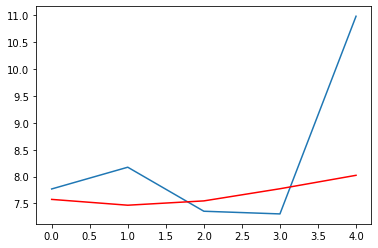

In [184]:
plt.plot(test2)
plt.plot(predictions_POMKH, color = 'red')

In [191]:
df_5 = df_3['PREMON'].values
print(df6.size)

train1 = df_5[1:20]
print(train1.size)

test1 = df_5[20:] 
print(test1.size)

25
19
5


In [192]:
#p,d,q  
#p = periods taken for autoregressive model
#d = Integrated order, difference
#q = periods in moving average model

model_arima = ARIMA(train1, order=(3, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

59.50855750101403


In [193]:
predictions_PREMON = model_arima_fit.forecast(steps=5)[0]
predictions_PREMON

array([11.07674542, 11.40469925, 12.02994582, 12.60244689, 13.37071001])

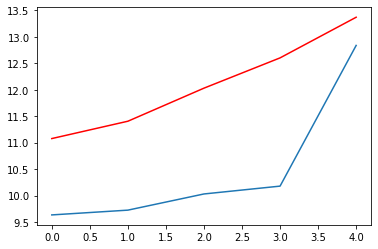

In [194]:
plt.plot(test1)
plt.plot(predictions_PREMON, color = 'red')